# **Business case:**

*   _This project aims to **group FIFA players** from **FIFA 15** to **FIFA 20** based on their various **skills** and **categorize players** into distinct **groups** based on their strengths and weaknesses._


# **Importing Libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/players_20.csv')
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [4]:
pd.set_option('display.max_columns',None)
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [ ]:
data.drop(columns=['player_url'],axis=1,inplace=True)

**INSIGHTS**

*   _The first thing we did was importing the **essential libraries** which are needed inorder to work with the dataset._

*   _Then, we loaded the data from a **CSV file** using **pandas** a popular data analysis library, and thereby named it **data**._

*   _We used a pandas function **pd.set_option** to **display all the columns** in order to get an overview of this dataset._

*   _This dataset's readability has been enhanced by **Renaming** some certain **columns** which enables us easier to read_

*   _Finally we Dropped the **player url** column which is irrelevat to this dataset_


# **Domain Analysis**

*   _This project appears to be focused on **clustering the football players** based on their attributes._

*   _The **aim** is **not** to rank them by **overall skill** or **reputation**, but rather to group them based on their entire skillset._

*   _**Player Attributes** encompass a wide range of skills, categorized as **physical** (age, height, strength), **technical** (passing, dribbling, ball control), **tactical** (positioning, work rate), **mental** (composure, reactions), and **specialized skills** (finishing, free kicks)._

*  _Additionally, playing style is factored in, considering **preferred foot** and **positions** (striker, winger, etc.)._

*  _By analyzing various player attributes, it aims to uncover how footballers develop unique skillsets within the game._

# **Basic checks**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [6]:
data.shape

(18278, 104)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sofifa_id,18278.0,219738.864482,27960.200461,768.0,204445.5,226165.0,240795.75,252905.0
age,18278.0,25.283291,4.656964,16.0,22.0,25.0,29.00,42.0
height_cm,18278.0,181.362184,6.756961,156.0,177.0,181.0,186.00,205.0
weight_kg,18278.0,75.276343,7.047744,50.0,70.0,75.0,80.00,110.0
overall,18278.0,66.244994,6.949953,48.0,62.0,66.0,71.00,94.0
...,...,...,...,...,...,...,...,...
goalkeeping_diving,18278.0,16.572765,17.738069,1.0,8.0,11.0,14.00,90.0
goalkeeping_handling,18278.0,16.354853,16.996925,1.0,8.0,11.0,14.00,92.0
goalkeeping_kicking,18278.0,16.212934,16.613665,1.0,8.0,11.0,14.00,93.0
goalkeeping_positioning,18278.0,16.368038,17.136497,1.0,8.0,11.0,14.00,91.0


In [8]:
data.drop_duplicates()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [9]:
data.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

**INSIGHTS**

*   _We can get a basic idea of the dataset by checking its data types (**dtypes**) and dimensions **(shape)**. This helps us understand what kind of data we're working with and how it's organized._.

*   _Using **describe().T** function we can compute summary **statistics** for the **numerical columns** in the data_.

*   _Finally we **drop the duplicates** which are in the dataset and we identify the **missing values (NaN or None)** using **isnull()** function.  which identifies null values in the Dataset_

# **Exploratory Data Analysis**

## **Univaraite analysis**

In [ ]:
!pip install ydata_profiling[notebook]

In [ ]:
import ydata_profiling as yp

profile = yp.ProfileReport(data)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
pip install sweetviz

In [ ]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html()
report.show_notebook()

**INSIGHTS**

*   _**Univariate analysis** is essential because it **Unveils patterns and trends** within individual variables and lays the **groundwork** for further analysis by **highlighting potential relationships** between the variable._

*   _We can leverage the two powerful tools for data exploration: **Pandas profiling** and **Sweetviz**._

*   _**Pandas profiling** offers an **interactive report** summarizing key aspects like **data types, distributions, missing values,** and **correlations**. This saves our time spent on manual **data exploration**_.

*   _**Sweetviz** delves deeper, providing comprehensive reports that include **visualizations, statistics**, and **comparisons** between training and testing datasets_

# **Data Preprocessing**



*   _Handling Missing Values_

*   _Encoding_

*   _Handling Outliers_

*   _Feature Selection_

*   _Dropping Unique and Highly correlated Features_

## **Handling Missing Values**

In [10]:
data.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [11]:
null_cols = data.columns[data.isnull().any()]
print('Columns with Null Values:',null_cols)

Columns with Null Values: Index(['release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')


In [12]:
total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()
percentage_missing = (total_missing/total_cells)*100
print('Percentage of Missing data overall:',percentage_missing,'%')

Percentage of Missing data overall: 12.885130926628902 %


In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
for col in null_cols:
  if pd.api.types.is_numeric_dtype(data[col]):
    data[col] = imputer.fit_transform(data[[col]])[:, 0]

for col in null_cols:
  if not pd.api.types.is_numeric_dtype(data[col]):
    data[col].fillna(data[col].mode(dropna=True).iloc[0], inplace=True)

  if data[col].isnull().sum() / len(data) > 0.5:
    data.drop(col, axis=1, inplace=True)

In [14]:
total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()
percentage_missing = (total_missing/total_cells)*100
print('Percentage of Missing data overall:',percentage_missing,'%')

Percentage of Missing data overall: 0.0 %


**INSIGHTS**

*   _**Missing values** can significantly impact the data.  They can lead to **biased results, inaccurate models**, and reduced efficiency of algorithms._

*   _We utilized the **data.columns[data.isnull().any()]** function to detect any **null values** which are in the dataset and calculated the percentage of missing data across the dataset_.

*  _The dataset contained incomplete data **(missing values)**. To address this, we employed the **Simple Imputer** function_.

*  _This technique **fills** the **missing values**, mitigating potential bias in the results, **enhancing model accuracy**, and making the data compatible with a broader selection of algorithms._


## **Encoding**

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [16]:
categorical_columns = [col for col,
                       dtype in data.dtypes.items()
                       if str(dtype) in ('object','categorical')]
categorical_columns

['player_url',
 'short_name',
 'long_name',
 'dob',
 'nationality',
 'club',
 'player_positions',
 'preferred_foot',
 'work_rate',
 'body_type',
 'real_face',
 'player_tags',
 'team_position',
 'loaned_from',
 'joined',
 'nation_position',
 'player_traits',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb']

In [17]:
numerical_columns = [col for col,
                       dtype in data.dtypes.items()
                       if np.issubdtype(dtype,np.number)]
numerical_columns

['sofifa_id',
 'age',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'release_clause_eur',
 'team_jersey_number',
 'contract_valid_until',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'ment

In [18]:
float_columns = data.select_dtypes(include='float64').columns

In [19]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in categorical_columns:
  data[col] = LE.fit_transform(data[col])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(88)
memory usage: 14.5 MB


**INSIGHTS**

*   _By converting text and categories into a numerical language, **Encoding** unlocks the ability of **machine learning models** to **decrypt** connections between features and thereby leading to sharper predictions._

*   _We applied the **Label Encoder** technique for encoding. Utilizing label encoding within a **For Loop function**, we iterated through both the categorical and float columns, **converting** them to **int64**_.



## **Handling Outliers**

In [21]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
LB = Q1-1.5*IQR
UB = Q3+1.5*IQR
outliers_count = ((data<LB)|(data>UB)).sum()
outliers_percentage = (outliers_count/len(data))*100
print('\nsum of percentage:\n',outliers_percentage)


sum of percentage:
 sofifa_id     1.827333
player_url    0.000000
short_name    0.000000
long_name     0.000000
age           0.103950
                ...   
lb            0.131305
lcb           0.000000
cb            0.000000
rcb           0.000000
rb            0.131305
Length: 104, dtype: float64


In [22]:
for column_name, percentage in outliers_percentage.items():
    if percentage < 5:
        print(f'{column_name}: {percentage}')

sofifa_id: 1.8273334062807747
player_url: 0.0
short_name: 0.0
long_name: 0.0
age: 0.10395010395010396
dob: 0.0
height_cm: 0.48692417113469744
weight_kg: 0.39938724149250465
nationality: 0.0
club: 0.0
overall: 0.8261297734981946
potential: 0.7933034248823723
player_positions: 0.0
skill_moves: 0.26808184702921545
work_rate: 0.0
body_type: 0.0
team_position: 1.7014990699201225
team_jersey_number: 3.889922310974943
joined: 0.0
contract_valid_until: 0.01641317430791115
nation_position: 2.94890031732137
shooting: 0.049239522923733445
passing: 3.0856767698872964
dribbling: 4.4534412955465585
defending: 0.0
physic: 2.368968158441843
attacking_crossing: 0.0
attacking_finishing: 0.0
attacking_volleys: 0.0
skill_curve: 0.0
skill_fk_accuracy: 0.00547105810263705
skill_long_passing: 0.07112375533428165
movement_acceleration: 2.215778531568005
movement_sprint_speed: 2.730057993215888
movement_agility: 1.1434511434511436
movement_reactions: 0.880840354524565
movement_balance: 1.3568224094539885
power

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

outliers_count = ((data < LB) | (data > UB)).sum()
total_counts = data.count()
outliers_percentage = (outliers_count / total_counts) * 100
columns_to_keep = outliers_percentage[outliers_percentage < 5].index
data_filtered = data[columns_to_keep]

robust_scaler = RobustScaler()
refined_data = robust_scaler.fit_transform(data_filtered)

In [24]:
refined_data

array([[-1.87459509, -0.95666685,  0.1280654 , ..., -0.41666667,
        -0.41666667,  0.33333333],
       [-5.64958976, -0.43940472, -0.63244246, ..., -0.30555556,
        -0.30555556,  0.20833333],
       [-0.97094243, -0.72686984,  0.46837498, ..., -0.72222222,
        -0.72222222,  0.20833333],
       ...,
       [ 0.7198575 ,  0.96246649,  1.00104354, ..., -0.58333333,
        -0.58333333, -1.        ],
       [ 0.68624012,  0.87831701,  0.94399675, ..., -0.58333333,
        -0.58333333, -0.91666667],
       [ 0.20038377,  0.22372381,  0.56043829, ..., -0.52777778,
        -0.52777778, -0.91666667]])

**INSIGHTS**

*   _Outliers act as **red flags** and it can reveal **unexpected patters** or **errors** in the data that can **impact** how we analyze data and make decisions._

*   _To manage **outliers**, we utilized a **pipeline** combining **IQR** outlier detection and **Robust Scaling** for data normalization._

*   _Robust Scaler helps to maintain **data integrity**, improve **model training**, and ultimately lead to more reliable results._

*   _It helps us to pinpoint these outliers in the data, ultimately leading to more **accurate analyses** and **prevent misleading results**._

## **Feature Selelction**

<Axes: >

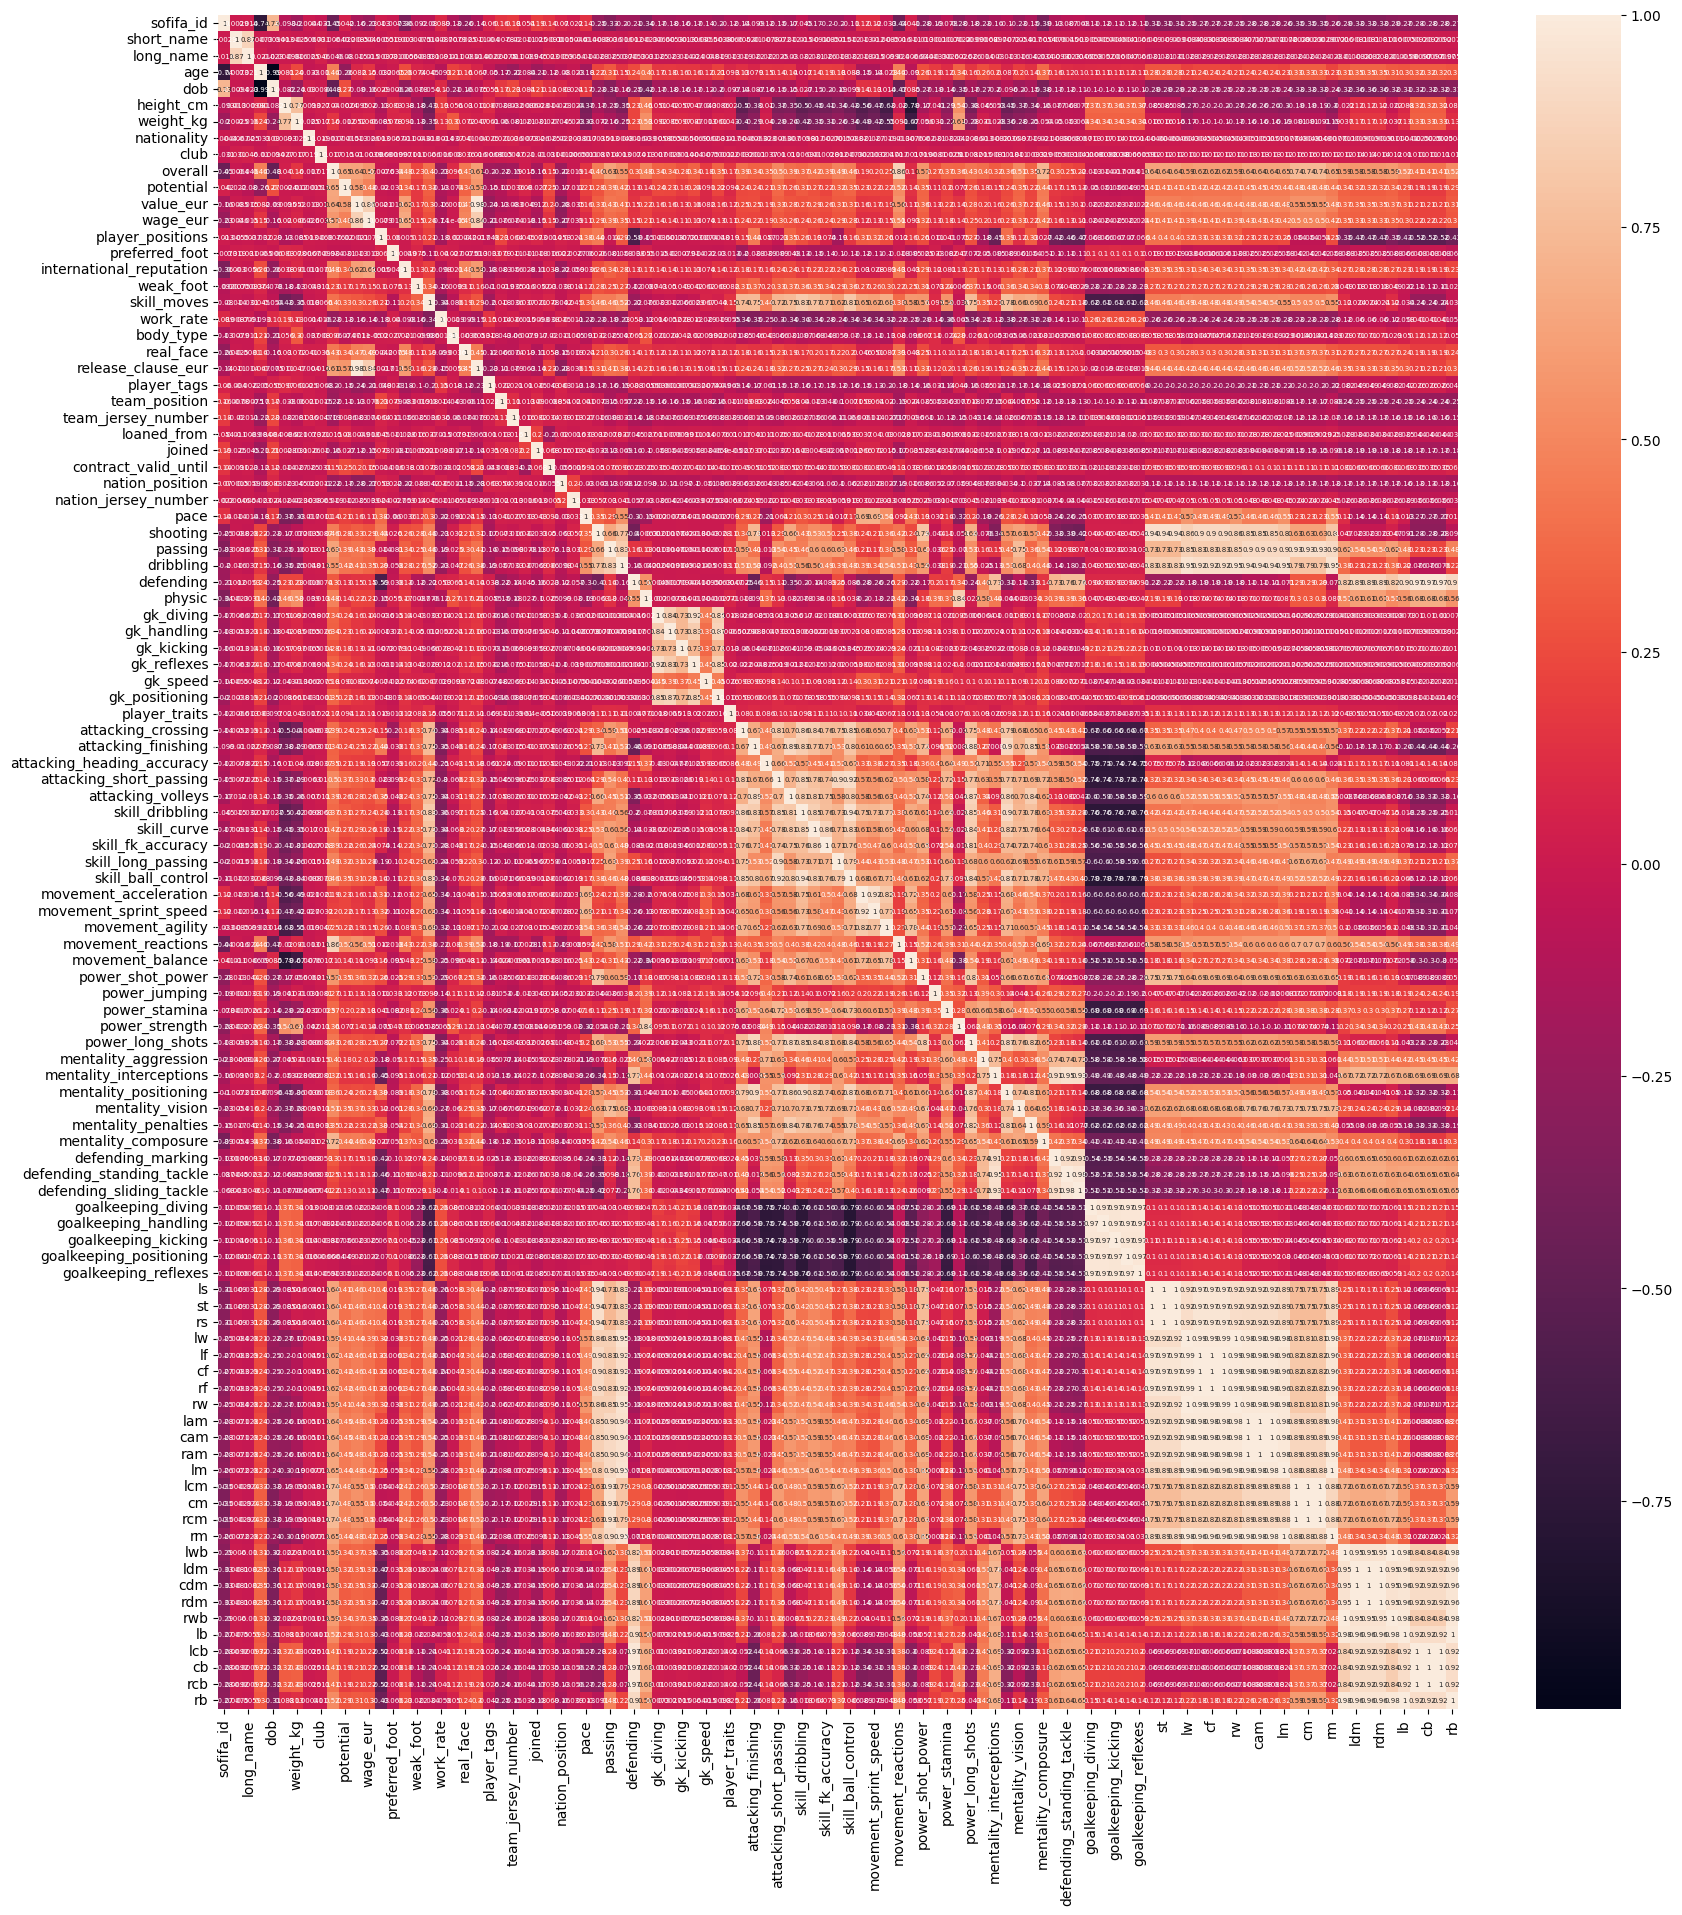

In [ ]:
plt.figure(figsize=(20, 22), facecolor='white')
sns.heatmap(data.corr(), annot=True, annot_kws={'size': 5})

**INSIGHTS**

*   _With the Help of **Feature selection** we can eliminate **irrelevant or redundant features**_.

*   _The model will focus on the information that **truly** matters for **prediction**. This can lead to more accurate and **generalizable models**, avoiding issues like **overfitting**_.

*   _To see how our features are interrelated, we used Seaborn's **heatmap** function. This will create a visual representation of **correlations** between the features in our data_.

## **Dropping Unique and Highly correlated Features**

In [25]:
unique_cols = [col for col in data.columns if data[col].nunique() == 1]

if unique_cols:
  print("Unique columns:", unique_cols)
else:
  print("No unique columns found")

No unique columns found


In [26]:
from sklearn.feature_selection import VarianceThreshold

data_variance = data.var()
selector = VarianceThreshold(threshold=0.1)
selector.fit(data)
filtered_data = selector.transform(data)
Data = pd.DataFrame(filtered_data, columns=data.columns[selector.get_support()])

In [ ]:
corr_matrix = Data.corr().abs()
mask = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.9
highly_correlated_pairs = [(col1, col2) for col1 in mask.columns for col2 in mask.columns if mask.loc[col1, col2] >= threshold]
for col1, col2 in highly_correlated_pairs:
    correlation = corr_matrix.loc[col1, col2]
    print(f"Features '{col1}' and '{col2}' are highly correlated with correlation coefficient {correlation:.2f}")

In [28]:
corr_matrix = Data.corr().abs()
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
corr_matrix_masked = corr_matrix.where(mask)
threshold = 0.9
highly_correlated_pairs = [(col1, col2)
                            for col1 in corr_matrix.columns
                            for col2 in corr_matrix.columns
                            if corr_matrix_masked.loc[col1, col2] >= threshold]

for col1, col2 in highly_correlated_pairs:
    if col1 in Data.columns and col2 in Data.columns:
        correlation_col1 = corr_matrix.loc[col1, :].sum()
        correlation_col2 = corr_matrix.loc[col2, :].sum()

        if correlation_col1 > correlation_col2:
          Data.drop(columns=[col1], inplace=True)
        else:
          Data.drop(columns=[col2], inplace=True)

print("Removed highly correlated features:")
for col1, col2 in highly_correlated_pairs:
    if col1 in Data.columns and col2 in Data.columns:
        print(f"Removed one of the features from pair: '{col1}' and '{col2}'")

Removed highly correlated features:


**INSIGHTS**

* _We need to **drop** the **unique** and **constant columns**. By dropping unique columns and constant features, it ensure that clustering algorithms will focus on the relevant information present in the data, leading to more meaningful and informative clusters_.

* _We employed **Variance threshold** which helps to **reduce noise**, improve **clustering performance**, and potentially enhance efficiency_.

*  _**Absolute Correlation Matrix & Upper Triangle Mask**: Calculates the absolute value of pairwise correlations in Data and creates a mask that excludes the redundant lower triangle using **NumPy triu**_.

* _**Identify Highly Correlated Pairs using mask**: Focuses only on the upper triangle of the correlation matrix using the mask to find feature pairs exceeding a certain correlation threshold_.

* _The loop goes through **highly correlated pairs**, verifies if both features exist in Data, and computes the sum of absolute correlations for each feature (measuring overall correlation with other features)_.

* _Finally we remove Less Informative Feature based on **Overall Correlation**: The code prioritizes keeping the feature with a **higher overall correlation** (potentially more informative) by **dropping** its **less correlated** counterpart from Data using inplace=True._

# **Model Implementation**

*   _K-means_
*  _Hierarchical Clustering_


## **K-Means**

In [51]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=10)),
    ('kmeans', KMeans(n_clusters=3))])

pipeline.fit(Data)
cluster_labels = pipeline.predict(Data)

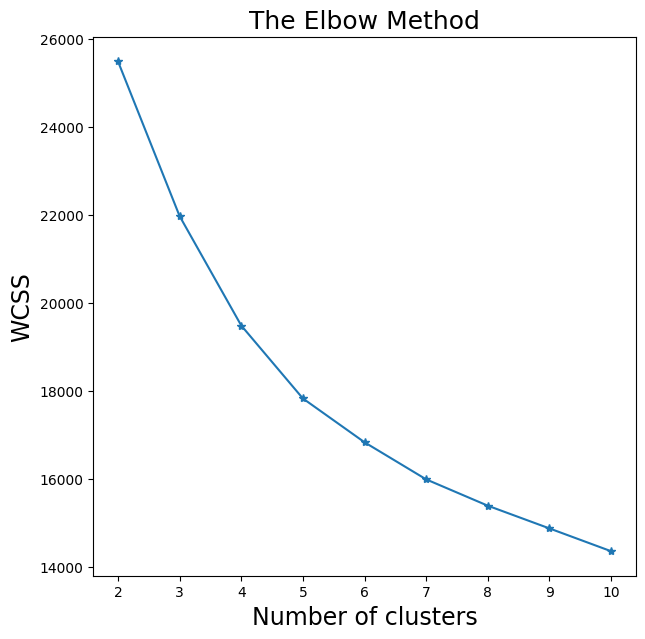

In [52]:
wcss = []
for i in range(2, 11):
    pipeline.set_params(kmeans__n_clusters=i)
    pipeline.fit(Data)
    wcss.append(pipeline.named_steps['kmeans'].inertia_)

plt.figure(figsize=(7, 7))
plt.plot(range(2, 11), wcss, marker='*')
plt.title('The Elbow Method', fontsize=18)
plt.xlabel('Number of clusters', fontsize=17)
plt.ylabel('WCSS', fontsize=17)
plt.show()

In [53]:
from sklearn.metrics import silhouette_score
min_clusters = 2
max_clusters = 10
silhouette_scores = []

for k in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=43)
    cluster_labels = kmeans.fit_predict(Data)
    silhouette_avg = silhouette_score(Data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

best_score_index = silhouette_scores.index(max(silhouette_scores))
best_score = silhouette_scores[best_score_index]
best_num_clusters = min_clusters + best_score_index

print("Overall best silhouette score:", best_score)
print("Number of clusters for the best silhouette score:", best_num_clusters)

Overall best silhouette score: 0.8935803179693239
Number of clusters for the best silhouette score: 2


**INSIGHTS**

*   _**K-Means** is a valuable tool for **clustering datasets** due to its simplicity, efficiency, and interpretability. Here we used **pipeline** for **scaling, PCA, and KMeans**_

*   _**Pipelines** are Key essentials for **Building a Strong Foundation**. It offers a powerful approach to organizing the steps involved in scaling, PCA, and KMeans._

*  _We employed **Elbow Method** which is a relatively **straightforward visual** approach to determine the number of **clusters (K)** in K-Means clustering._

*  _To ensure well-defined clusters, we employed the **silhouette score** from **scikit-learn**. This metric assesses how well data points are separated within their assigned groups_.

*  _Our project achieved a silhouette score of **89.35%**, indicating a clear distinction between clusters. This suggests the **data points** were **effectively grouped** based on their attributes_.

## **Hierarchical Clustering**

In [57]:
from sklearn.cluster import AgglomerativeClustering

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=3))
])

features = pipe.fit_transform(Data)

hierarchical_clustering = AgglomerativeClustering(n_clusters=3)
cluster_labels = hierarchical_clustering.fit_predict(features)

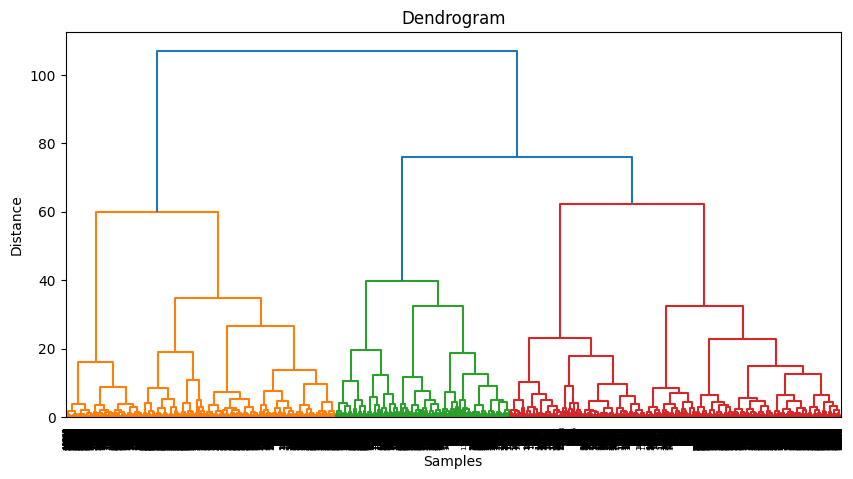

In [65]:
from scipy.cluster import hierarchy

plt.figure(figsize=(10, 5))
linkage_matrix = hierarchy.linkage(features, method='ward')
dn = hierarchy.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [58]:
min_clusters = 2
max_clusters = 10
silhouette_scores = []

for k in range(min_clusters, max_clusters + 1):
    hierarchical_clustering = AgglomerativeClustering(n_clusters=k)
    cluster_labels = hierarchical_clustering.fit_predict(Data)
    silhouette_avg = silhouette_score(Data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

best_num_clusters = silhouette_scores.index(max(silhouette_scores)) + min_clusters

print("Overall best silhouette score:", max(silhouette_scores))
print("Number of clusters for the best silhouette score:", best_num_clusters)

Overall best silhouette score: 0.8898582918892435
Number of clusters for the best silhouette score: 2


**INSIGHTS**

*   _Unlike **K-Means**, which assigns data points to a single, pre-defined number of clusters, **hierarchical clustering** creates a hierarchy of clusters._

* _It can reveal **nested structures** and **relationships** within the data that K-Means might miss._

* _**Dendrogram** provides a visual exploration of **hierarchical relationships** and potential cluster structure within the data._

*   _To ensure well-defined clusters, we employed the **silhouette score** from **scikit-learn**. This metric assesses how well data points are separated within their assigned groups_.

*  _We achieved silhouette score of **88.89%** suggests a strong hierarchical structure within the data. This indicates that data points are **not only well-grouped** but also **with higher-level clusters** likely containing more similar **sub-clusters**._


## **Model Comparison**

In [63]:
from tabulate import tabulate

metrics = {
    'K-Means': {'Silhouette score': 0.89},
    'Hierarchical Clustering': {'Silhouette score': 0.88}
}

table_data = []
headers = ['Model', 'Score']

for model, report in metrics.items():
    table_data.append([model, report['Silhouette score']])

print(tabulate(table_data, headers=headers, tablefmt='fancy_grid'))

╒═════════════════════════╤═════════╕
│ Model                   │   Score │
╞═════════════════════════╪═════════╡
│ K-Means                 │    0.89 │
├─────────────────────────┼─────────┤
│ Hierarchical Clustering │    0.88 │
╘═════════════════════════╧═════════╛


 **INSIGHTS**

*   _A **model comparison report** helps us to see whether which model **performs the best**_.

*   _By analyzing the various factors and how each model weighs, we gain a deeper understanding of **decision-making** processes, ultimately allowing us to make more **strategic choices**._

*   _Based on our model comparison, **K-Means** appears to be the **most promising model**_.

*   _The **silhouette score of 89.35%** indicates strong **cluster separation** and overall performance in your KMeans clustering._

*  _This suggests that data points are well-assigned to their respective clusters based on their attributes, leading to a **high rate of accurate cluster memberships**._

# **Visual Representations for the Task**

 **Task:**

1.   _Prepare a rank ordered list of top 10 countries with most players. Whichcountries are producing the most footballers that play at this level?_

2.   _Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?_

3.    _Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger?_

**Task - 1:**

In [ ]:
pip install plotly

In [ ]:
country_counts = data['nationality'].value_counts()
top_10_countries = country_counts.sort_values(ascending=False).head(10)
print("Top 10 countries with the most players:")
print(top_10_countries)

Top 10 countries with the most players:
nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: count, dtype: int64


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(x=top_10_countries.index,y=top_10_countries.values,
                             marker_color='#94baff')])
fig.update_layout(title='Top 10 Countries with the Most Players',
                  xaxis=dict(title='Country', tickangle=0),
                  yaxis=dict(title='Number of Players'),
                  plot_bgcolor='white',width=800,height=500)
fig.show()

**INSIGHTS**

*   _Our first task was to identify the **top 10 countries** with the most **players** in the dataset._

*   _With **plotly.graph_objects**, we were able to create **visualizations** that revealed **valuable insights**._

*   _It's clear that **England dominates** with **1667** players, followed by **Germany (1216)** and **Spain (1035)**._



**Task - 2:**

In [ ]:
import plotly.express as px
age_ratings = data.groupby('age')['overall'].mean().reset_index()
fig = px.bar(data, x='age', y='overall', title='Overall Rating vs. Age of Players',
                 labels={'Age of Players': 'age', 'Overall': 'Overall Rating'}, color_discrete_map={'overall': '#011f4b'})
fig.update_layout(plot_bgcolor='white')
fig.show()

**INSIGHTS**

*   _The second task was creating a **distribution plot** to explore how **overall rating** is distributed across **player ages**._

*   _With the help of **plotly.express**  Offers a **simple** and more **concise** way to create charts which enables **quicker exploration** of different visualization types and **data relationships**._

*  _The graph shows a potential **leveling off** in overall rating around **42 years old**, which could suggest that players reach their **peak performance** at this age._


**Task - 3:**

In [ ]:
from tabulate import tabulate

offensive_players = data[data['player_positions'].isin(['ST', 'RS', 'LS', 'RW', 'LW'])]
sorted_offensive_players = offensive_players.sort_values(by='wage_eur', ascending=False)
top_10_offensive_players = sorted_offensive_players.head(10)

print("Top 10 highest-paid offensive players:")
table_data = []
for index, player in top_10_offensive_players.iterrows():
    table_data.append([player['short_name'],
                       player['age'],
                       player['nationality'],
                       player['club'],
                       player['player_positions'],
                       player['wage_eur']])

headers = ["Name", "Age", "Nationality", "Club", "Positions","Wages (EUR)"]
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))

Top 10 highest-paid offensive players:
╒════════════════╤═══════╤════════════════════╤═════════════════════╤═════════════╤═══════════════╕
│ Name           │   Age │ Nationality        │ Club                │ Positions   │   Wages (EUR) │
╞════════════════╪═══════╪════════════════════╪═════════════════════╪═════════════╪═══════════════╡
│ L. Suárez      │    32 │ Uruguay            │ FC Barcelona        │ ST          │        355000 │
├────────────────┼───────┼────────────────────┼─────────────────────┼─────────────┼───────────────┤
│ S. Agüero      │    31 │ Argentina          │ Manchester City     │ ST          │        300000 │
├────────────────┼───────┼────────────────────┼─────────────────────┼─────────────┼───────────────┤
│ R. Lewandowski │    30 │ Poland             │ FC Bayern München   │ ST          │        235000 │
├────────────────┼───────┼────────────────────┼─────────────────────┼─────────────┼───────────────┤
│ H. Kane        │    25 │ England            │ Tottenham Hot

**INSIGHTS**

*  _Next, we examined which **offensive player** category has the **highest salaries**._

*  _Using the **Tabulate** method, we found that **Luis Suárez**, a 32-year-old **Striker (ST)** playing for **FC Barcelona**, Secured the top position with a salary of **€355,000**._

# **Challenges Faced**


1.   _**Mixed Data Types:** The data contains both numbers (e.g., age, ratings) and categories (e.g., preferred foot, work rate). To handle this mix, we might need to convert categories into numerical codes and adjust numerical scales for consistent clustering._

2. _**Handling Outliers**: Players with very different attributes **(outliers)** can significantly affect how groups are formed. We need to decide whether to **remove them** or to **retain** for that we used **IQR** and **Robust Scaler** methods that can handle such outliers effectively._

3.   _**Feature Scaling**: Some clustering algorithms are picky about the scale of data. We need to ensure all features (age, skills) are on a similar scale to avoid some features dominating the clustering process._

4.  _**High Dimensionality**: The dataset has a vast array of player attributes, making it **"high-dimensional."** Analyzing such type of data can be computationally demanding and need necessitate techniques like PCA which is required to use to reduce the complexity._

5. _**Choosing the Number of Clusters**:  Choosing the best number of player groups (clusters) is crucial. Techniques like the **elbow method**, **silhouette score** can helps, but finding the perfect number can be difficult._


# **Conclusion**

*   _Our analysis suggests **KMeans clustering** is the **best approach** for grouping football players. The high silhouette score (89.35%) shows players are effectively assigned to distinct clusters based on their skills._

*   _This **successful clustering** allows us to **analyze player** strengths and weaknesses within roles, build balanced teams, and develop targeted tactics for optimal performance._

